This notebook is a sample code with Japanese comments.

Ref: [TRAINING A CLASSIFIER](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

# 3.2 Titanicの先へ行く②！　画像データに触れてみよう

In [2]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 MB 38.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 47.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 49.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
# CIFAR10という画像分類のデータを使用
# テーブルデータと共通する部分
# - 機械学習の教師あり学習
#   - 学習用データセットの特徴量、目的変数の対応関係を機械学習アルゴリズムで学習して未知のデータセットに対する性能を得る
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


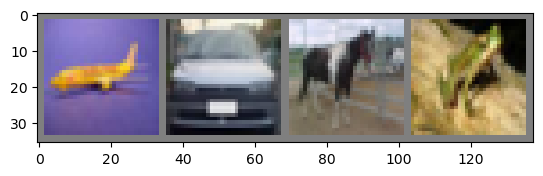

plane   car horse  frog


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 画像を可視化
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
images.shape

torch.Size([4, 3, 32, 32])

In [9]:
# 画像1枚の数値データがTitanicでのテーブル1行に対応
images[0]

tensor([[[-0.0824, -0.0431, -0.0039,  ..., -0.2392, -0.2941, -0.3412],
         [-0.0667, -0.0196,  0.0118,  ..., -0.2157, -0.2706, -0.3255],
         [-0.0588, -0.0196,  0.0275,  ..., -0.2157, -0.2627, -0.3098],
         ...,
         [-0.3255, -0.3020, -0.2706,  ..., -0.2941, -0.3098, -0.3333],
         [-0.3490, -0.3333, -0.3098,  ..., -0.3176, -0.3333, -0.3490],
         [-0.3569, -0.3412, -0.3333,  ..., -0.3412, -0.3569, -0.3804]],

        [[-0.1843, -0.1451, -0.1059,  ..., -0.3176, -0.3647, -0.4118],
         [-0.1686, -0.1216, -0.0902,  ..., -0.2941, -0.3412, -0.3961],
         [-0.1608, -0.1216, -0.0745,  ..., -0.2863, -0.3333, -0.3804],
         ...,
         [-0.4431, -0.4196, -0.3882,  ..., -0.3882, -0.4039, -0.4275],
         [-0.4667, -0.4510, -0.4196,  ..., -0.4118, -0.4275, -0.4431],
         [-0.4745, -0.4588, -0.4510,  ..., -0.4353, -0.4510, -0.4745]],

        [[ 0.4431,  0.4745,  0.5137,  ...,  0.3176,  0.2706,  0.2235],
         [ 0.4510,  0.4980,  0.5294,  ...,  0